In [1]:
import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import autocorrelation_plot, lag_plot

DATA_DIR = Path().resolve().parent.joinpath('data')

In [2]:
def parse_dates(string: str) -> datetime.date:
    """Convert Date String to DateTime Object

    Args:
        string (str): _description_

    Returns:
        datetime.date: _description_
    """
    date_int_triplet = list(map(int, string.split('-M'))) + [1]
    return datetime.date(*date_int_triplet)

In [3]:
kwargs = {
    'filepath_or_buffer': DATA_DIR.joinpath('trade.txt'),
    'sep': '\t',
    'index_col': 0,
    'date_parser': parse_dates,
    'encoding': 'cp1251',
}

In [4]:
df = pd.read_csv(**kwargs)

In [5]:
# =============================================================================
# Data Signature
# =============================================================================
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2000-01-01 to 2004-02-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Количество  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes
         Количество
count  5.000000e+01
mean   1.651531e+06
std    5.549682e+05
min    4.625234e+05
25%    1.370451e+06
50%    1.701352e+06
75%    2.080112e+06
max    2.662781e+06


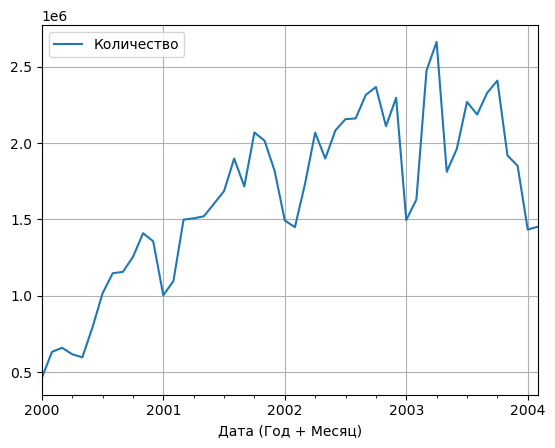

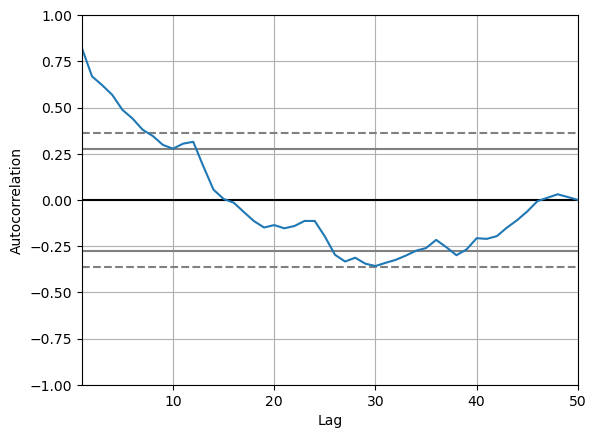

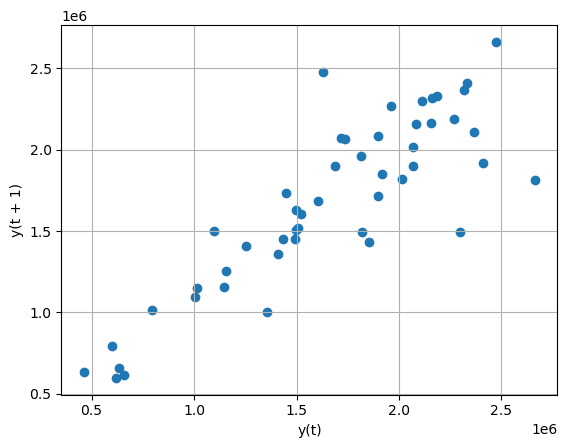

In [6]:
# =============================================================================
# Plotting
# =============================================================================
df.plot(grid=True)

plt.figure(0)
df.pipe(autocorrelation_plot)
plt.show()

plt.figure(1)
df.pipe(lag_plot)
plt.grid()
plt.show()